## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

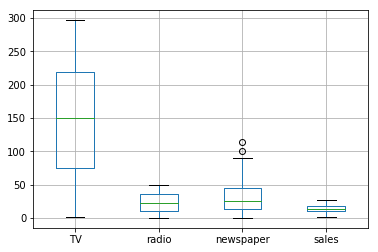

In [2]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

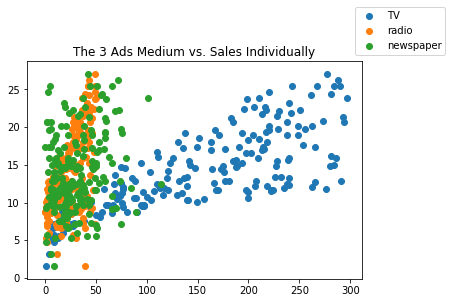

In [3]:
plt.scatter(df["TV"],df["sales"],label="TV")
plt.scatter(df["radio"],df["sales"],label="radio")
plt.scatter(df["newspaper"],df["sales"],label="newspaper")
plt.title('The 3 Ads Medium vs. Sales Individually') 
plt.legend(bbox_to_anchor=(1.25,1.25),loc=1,borderaxespad=0.)
plt.show()

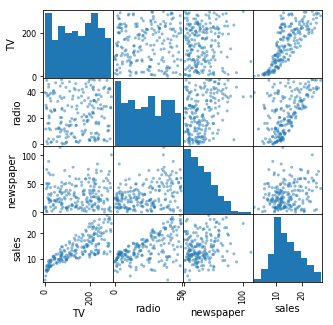

In [4]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(5,5))
plt.show()


In [5]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Which of the variables seem correlated with one another? Which don't? Explain your answer: 

From the correlation matrix we can see that TV and Sales variables have correlation 0.782,which is the largrest among the 3 channels. The second one is the correlation between Radio and Sales, which is 0.576. While its correlation with Newspaper is around 0.228, which is not high. This result is corresponding to the scatterplots we observed.


### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

a) Set y to be the sales in df

In [7]:
y = df['sales']

b) Set X to be just the features described above in df

In [8]:
X = df.drop(['sales'],1)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42)

d) Train model on training data, and make predictions on testing data

In [10]:
regress = LinearRegression()
regress.fit(X_train,y_train)
print('The prediction is: \n',regress.predict(X_test))

The prediction is: 
 [ 16.4080242   20.88988209  21.55384318  10.60850256  22.11237326
  13.10559172  21.05719192   7.46101034  13.60634581  15.15506967
   9.04831992   6.65328312  14.34554487   8.90349333   9.68959028
  12.16494386   8.73628397  16.26507258  10.27759582  18.83109103
  19.56036653  13.25103464  12.33620695  21.30695132   7.82740305
   5.80957448  20.75753231  11.98138077   9.18349576   8.5066991
  12.46646769  10.00337695  21.3876709   12.24966368  18.26661538
  20.13766267  14.05514005  20.85411186  11.0174441    4.56899622]


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [11]:
print('R^2 is: \n',regress.score(X_test,y_test))

R^2 is: 
 0.899438024101


The R^2 score is about 0.9. A R^2 score 0.9 means that about 90% of the variance is explained by the model. Thus, the model performs relatively good.


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

Text(0.5,1,'Scatter plots of prediction vs. the actual value')

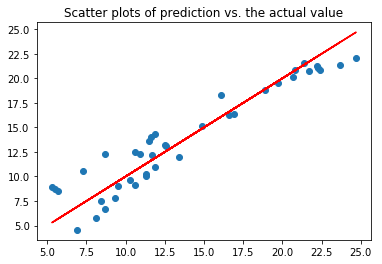

In [12]:
plt.scatter(y_test,regress.predict(X_test))
plt.plot(y_test,y_test,color='r')
plt.title("Scatter plots of prediction vs. the actual value")

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [13]:
print('Coefficients:\n',regress.coef_)
print("Residual sum of squares Error: %.2f"
      % np.mean((regress.predict(X_test) - y_test) ** 2))

Coefficients:
 [ 0.04472952  0.18919505  0.00276111]
Residual sum of squares Error: 3.17


##Explanation:
The coefficients represent the important features of the model. Each represent how many units will increase when one unit of the variable increases. The Residual Sum of Square Error measures the mean of all the residuals. We should check it before conclusion because if it is too large it means the model does not work really well.

Also, we can consider normalize the data set before run the regression since it seems that even though radio has the largest coefficient while TV has a much small one, which is not as same as that in the correlation matrix. This is maybe the varibales themselves are not at the same scale.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

From g), we know the coefficient of TV is about 0.0447, which means that with 1 unit increase in TV, the sale will increase about 0.0447. Similarly,the coefficient of radio is about 0.1892 , which means that with 1 unit increase in radio, the sale will increase about 0.1892. The coefficient of newspaper is about 0.0028, which means that with 1 unit increase in newspaper, the sale will increase about 0.0028.  
In order to measure the importance of the features involved, we can see which coefficient are the most significant. In order to measure the significant we need to standardize the coefficient and remove the collinear factors.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

/Users/Lannie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


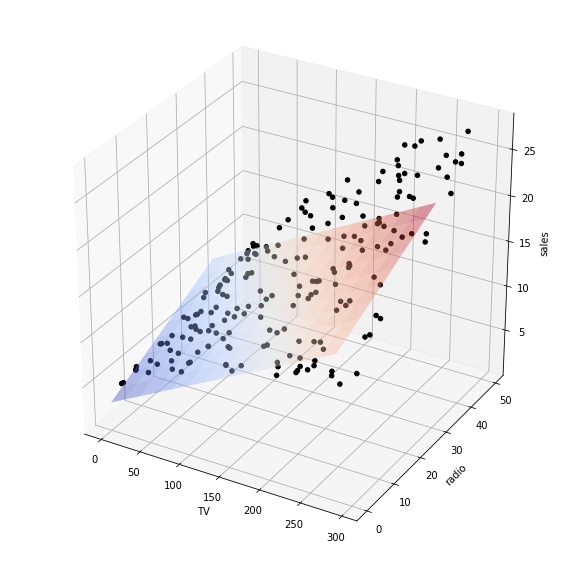

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio',data = df)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

x_surface = np.arange(0,300,20)
y_surface = np.arange(0,40,4)
x_surface,y_surface = np.meshgrid(x_surface,y_surface)

exog = pd.core.frame.DataFrame({'TV':x_surface.ravel(),'radio':y_surface.ravel()})
out = fit.predict(exog=exog)
ax.plot_surface(x_surface,y_surface,out.reshape(x_surface.shape),rstride=1,cstride=1,color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(df['TV'],df['radio'],df['sales'],c='black',marker='o',alpha=1)
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

##Explanation:
Since there might be interaction between TV and radio revealed from the plot. Thus we can introduce a new variable-the interaction term.

In [15]:
X['TV*radio']=X['TV']*X['radio']
size = float(len(X))

X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

regress = LinearRegression()
regress.fit(X_train, y_train)
print('Coefficients:', regress.coef_)
print("Residual sum of squares: %.2f"
      % np.mean((regress.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % regress.score(X_test, y_test))

Coefficients: [ 0.0190582   0.02365677  0.00388692  0.00110261]
Residual sum of squares: 0.42
Variance score: 0.98


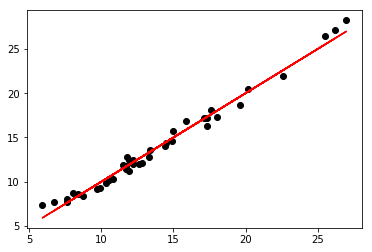

In [16]:
plt.scatter(y_test,regress.predict(X_test),color='black')
plt.plot(y_test,y_test,color='red')

From this new plot, we can see the scattered points are closely around the line, which indicates the prediction result has been improved.



## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [19]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [20]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, alpha):
    points = genfromtxt("/Users/Lannie/Downloads/data.csv", delimiter=",")
    learning_rate = alpha
    initial_b = 0 
    initial_m = 0 
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='black')

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


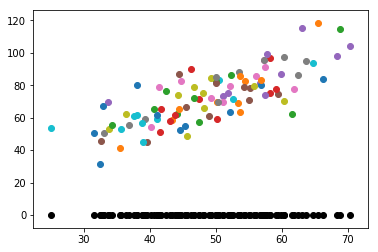

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


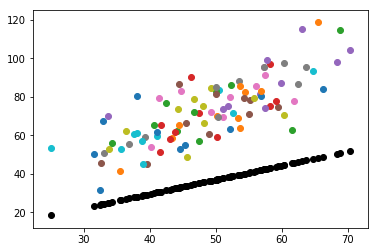

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


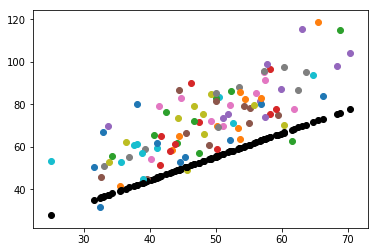

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


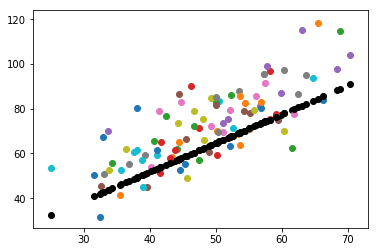

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


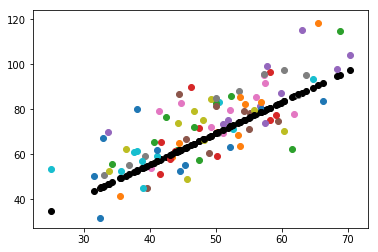

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


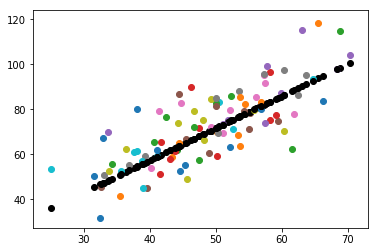

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


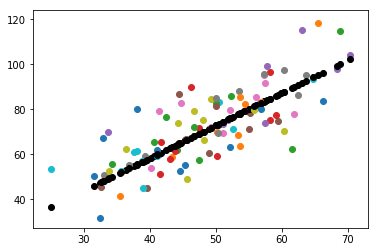

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


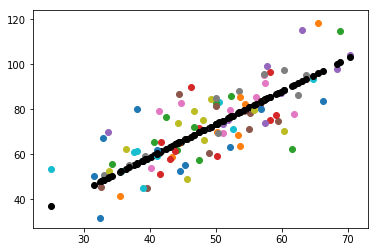

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


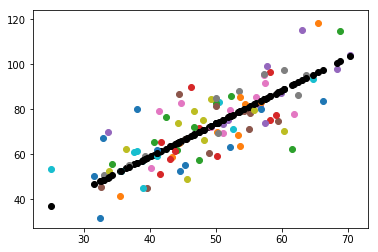

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


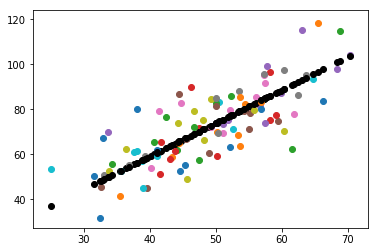

In [21]:
# Use this to visually discuss convergence rate based on learning rate
# First we can try when learning rate = 0.0001.
for num in range(0,10):
    run(num,alpha=0.0001)
    plt.show()


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


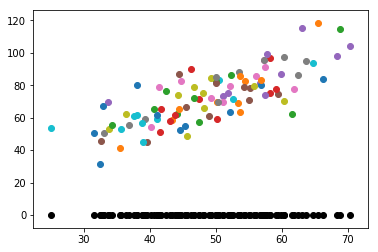

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 1.4547010110737295, m = 73.70702973591052, error = 13005291.973556822


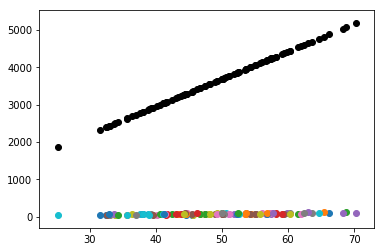

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -69.29117059663433, m = -3526.03734419513, error = 31019902536.469383


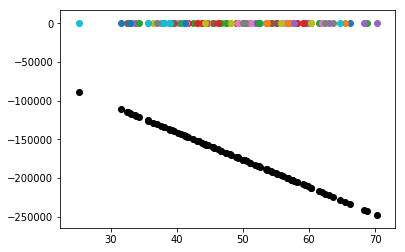

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 3386.1281598926735, m = 172279.96081408733, error = 73988548887160.3


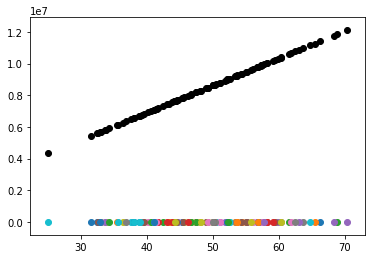

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -165370.96267269718, m = -8413815.837412365, error = 1.764771949187797e+17


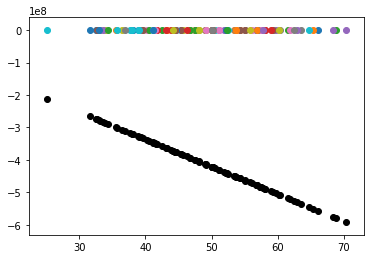

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 8076467.286535983, m = 410917957.6920109, error = 4.209327091134902e+20


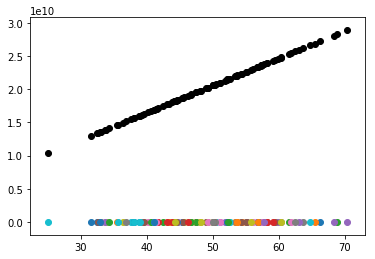

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -394442294.3119351, m = -20068603867.60211, error = 1.004007037187825e+24


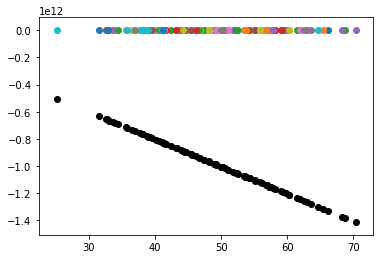

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 19263957769.165703, m = 980119888081.117, error = 2.3947536242684673e+27


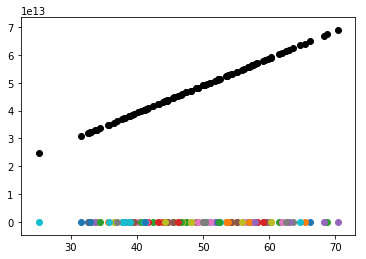

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -940822204463.576, m = -47867554777403.5, error = 5.711956897244446e+30


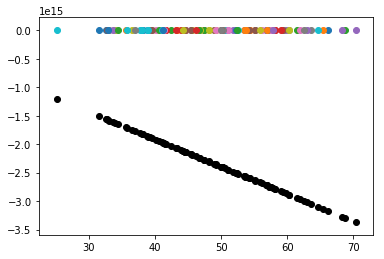

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 45948316074067.5, m = 2337778090451000.5, error = 1.362413705749997e+34


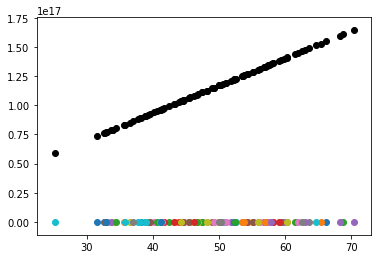

In [24]:
## Then we try a larger learning rate = 0.01.
for num in range(0,10):
    run(num,alpha=0.01)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


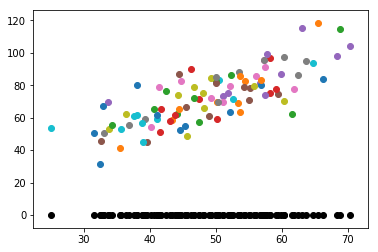

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


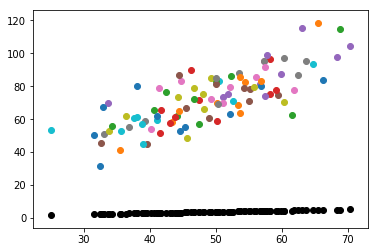

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


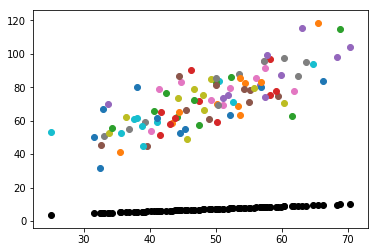

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


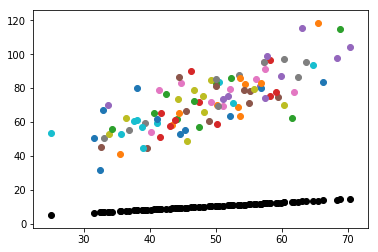

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


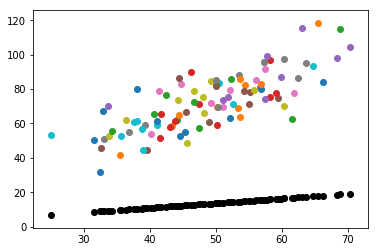

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


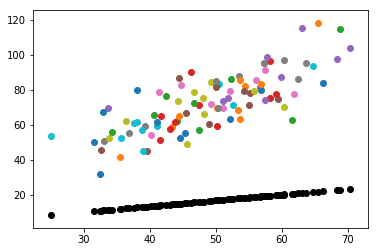

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


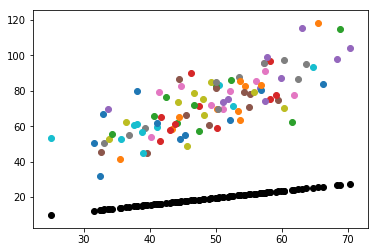

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


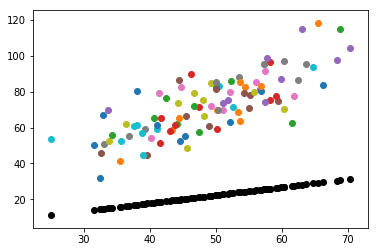

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


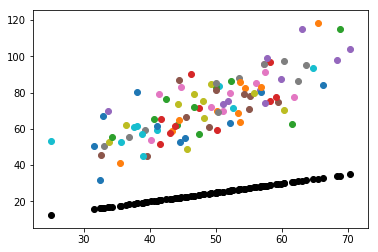

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


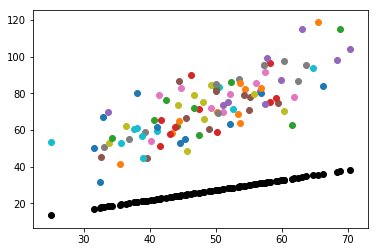

In [25]:
# Then we can try a small learning rate = 0.00001.
for num in range(0,10):
    run(num,alpha=0.00001)
    plt.show()

#Observation: 
From the above comparison, we can observe that for a relatively large learning rate, 0.01, the parameter in this sample does not converge. For a relatively small value of learning rate, 0.00001, the parameter converges in a slow rate. For the learning rate value in between(0.0001), the parameter converges more quickly at about the 9th interation.
#Explanation:
From these cases we can observe how different learning rates generate the time step size that the gradient descent method uses to minimize the convex function. The learning rate k is well represented in the function:
 $\beta_{n} = \beta_{n-1} - \kappa \nabla_{\beta} \mathcal{L}(\beta_{n-1})$.
From the equation we can conclude that the learning rate kappa can be seen as the weight to tune how much we want to emphasis on the gradient of cost function. If kappa is small it means that the difference between beta(n) and beta(n+1) is small. As a reult, it need a large number of steps(large n) at the seek of a minimum beta estimate.Therefore, it corresponding to the result above that, choosing a small learning rate gives a slowly convergent solution. On the contrary,a large learning rate can result in large step size that gives a divergent solution.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

Text(0.5,1,'Error vs. Learning rate')

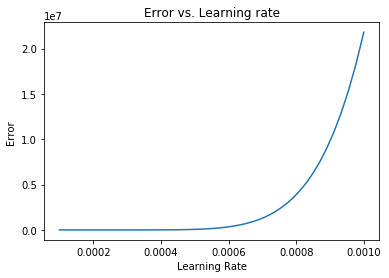

In [26]:
points = genfromtxt("/Users/Lannie/Downloads/data.csv", delimiter=",")

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 3
#print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
#print "Running..."
errors=[]
learning_rates = np.logspace(-4,-3,100)

for l in learning_rates:
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error ')

plt.plot(learning_rates,errors,label='num_iterations='+str(num_iterations))
plt.title("Error vs. Learning rate")